# Modelling - anxiety

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn import svm
from sklearn.preprocessing import label_binarize
from itertools import cycle

In [2]:
anxiety_data = pd.read_csv("anxiety_data.csv")

### I will do the first model for anxiety, without balancing. To see how it is.

In [3]:
X_anxiety = anxiety_data.drop("severeness_level_anxiety", axis = 1)
y_anxiety = anxiety_data["severeness_level_anxiety"]

In [4]:
X_train_anx, X_test_anx, y_train_anx, y_test_anx = train_test_split(X_anxiety, y_anxiety, test_size = 0.20, random_state = 123)

In [5]:
# Standardizing the dataframe.

std_scaler = StandardScaler().fit(X_train_anx)
X_anxiety_train_scaled = std_scaler.transform(X_train_anx)
X_anxiety_test_scaled = std_scaler.transform(X_test_anx)

#### Logistic regression

Error_metric     Train      Test
0     Accuracy  0.979470  0.979879
1    Precision  0.960112  0.959870
2       Recall  0.703047  0.705341

Confusion matrix for the train set
[[   80   653     0]
 [    0  4804     0]
 [    0     0 26270]]


/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


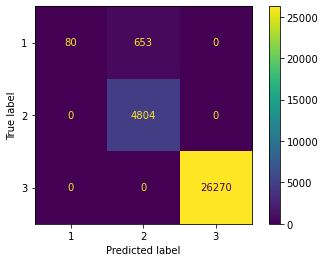



Confusion matrix for the test set
[[  21  160    0]
 [   0 1169    0]
 [   0    0 6602]]


/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


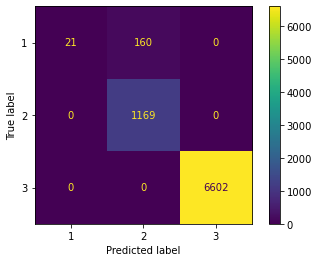

In [6]:
log_model = LogisticRegression(multi_class='ovr', max_iter = 5000) 
log_model.fit(X_anxiety_train_scaled, y_train_anx)
y_pred_train_log_anx = log_model.predict(X_anxiety_train_scaled)
y_pred_test_log_anx = log_model.predict(X_anxiety_test_scaled)

performance_log_anx = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train_anx, y_pred_train_log_anx),
                                         precision_score(y_train_anx, y_pred_train_log_anx, average = "macro"),
                                         recall_score(y_train_anx, y_pred_train_log_anx, average = "macro")],
                               'Test': [accuracy_score(y_test_anx, y_pred_test_log_anx),
                                        precision_score(y_test_anx, y_pred_test_log_anx, average = "macro"),
                                        recall_score(y_test_anx, y_pred_test_log_anx, average = "macro")]})

display(performance_log_anx)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train_anx,y_pred_train_log_anx))
plot_confusion_matrix(log_model,X_anxiety_train_scaled,y_train_anx, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test_anx, y_pred_test_log_anx))
plot_confusion_matrix(log_model,X_anxiety_test_scaled,y_test_anx, values_format = 'd')
plt.show()

#### KNN

Error_metric     Train      Test
0     Accuracy  0.930141  0.899019
1    Precision  0.755982  0.676278
2       Recall  0.838495  0.764738

Confusion matrix for the train set
[[  493   240     0]
 [  378  4324   102]
 [   13  1489 24768]]


/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


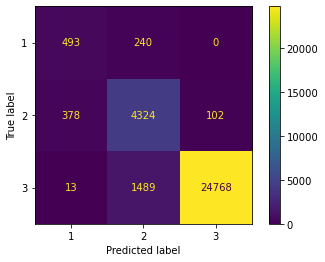



Confusion matrix for the test set
[[  96   85    0]
 [ 129  988   52]
 [   2  535 6065]]


/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


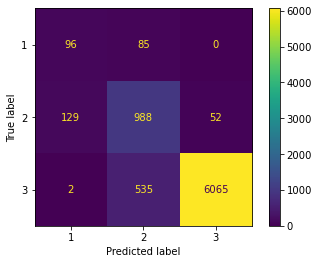

In [7]:
knn_model = KNeighborsClassifier(n_neighbors=6)
knn_model.fit(X_anxiety_train_scaled, y_train_anx)
y_pred_train_log_anx = knn_model.predict(X_anxiety_train_scaled)
y_pred_test_log_anx = knn_model.predict(X_anxiety_test_scaled)

performance_log_anx = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train_anx, y_pred_train_log_anx),
                                         precision_score(y_train_anx, y_pred_train_log_anx, average = "macro"),
                                         recall_score(y_train_anx, y_pred_train_log_anx, average = "macro")],
                               'Test': [accuracy_score(y_test_anx, y_pred_test_log_anx),
                                        precision_score(y_test_anx, y_pred_test_log_anx, average = "macro"),
                                        recall_score(y_test_anx, y_pred_test_log_anx, average = "macro")]})

display(performance_log_anx)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train_anx,y_pred_train_log_anx))
plot_confusion_matrix(knn_model,X_anxiety_train_scaled,y_train_anx, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test_anx, y_pred_test_log_anx))
plot_confusion_matrix(knn_model,X_anxiety_test_scaled,y_test_anx, values_format = 'd')
plt.show()

#### Decision tree

/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Error_metric     Train      Test
0     Accuracy  0.891816  0.893989
1    Precision  0.523336  0.523036
2       Recall  0.575608  0.579741

Confusion matrix for the train set
[[    0     0     0]
 [  733  3804  1708]
 [    0  1000 24562]]


/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


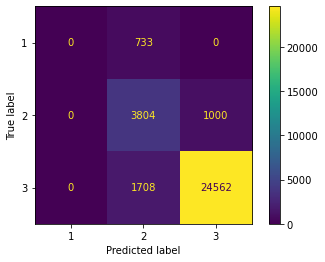

/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)




Confusion matrix for the test set
[[   0    0    0]
 [ 181  941  434]
 [   0  228 6168]]


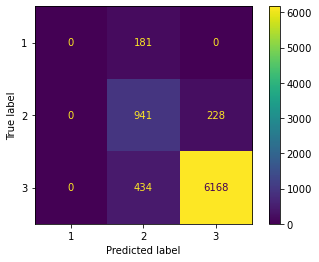

In [8]:
dt = DecisionTreeClassifier(max_depth=4)

dt.fit(X_train_anx, y_train_anx)

y_pred_train_dt_anx = dt.predict(X_train_anx)
y_pred_test_dt_anx = dt.predict(X_test_anx)


performance_df_anx = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train_anx, y_pred_train_dt_anx),
                                         precision_score(y_train_anx, y_pred_train_dt_anx, average = "macro"),
                                         recall_score(y_train_anx, y_pred_train_dt_anx, average = "macro")],
                               'Test': [accuracy_score(y_test_anx, y_pred_test_dt_anx),
                                        precision_score(y_test_anx, y_pred_test_dt_anx, average = "macro"),
                                        recall_score(y_test_anx, y_pred_test_dt_anx, average = "macro")]})

display(performance_df_anx)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train_anx,y_pred_train_dt_anx).T)
plot_confusion_matrix(dt,X_train_anx,y_train_anx, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test_anx,y_pred_test_dt_anx).T)
plot_confusion_matrix(dt,X_test_anx,y_test_anx, values_format = 'd')
plt.show()

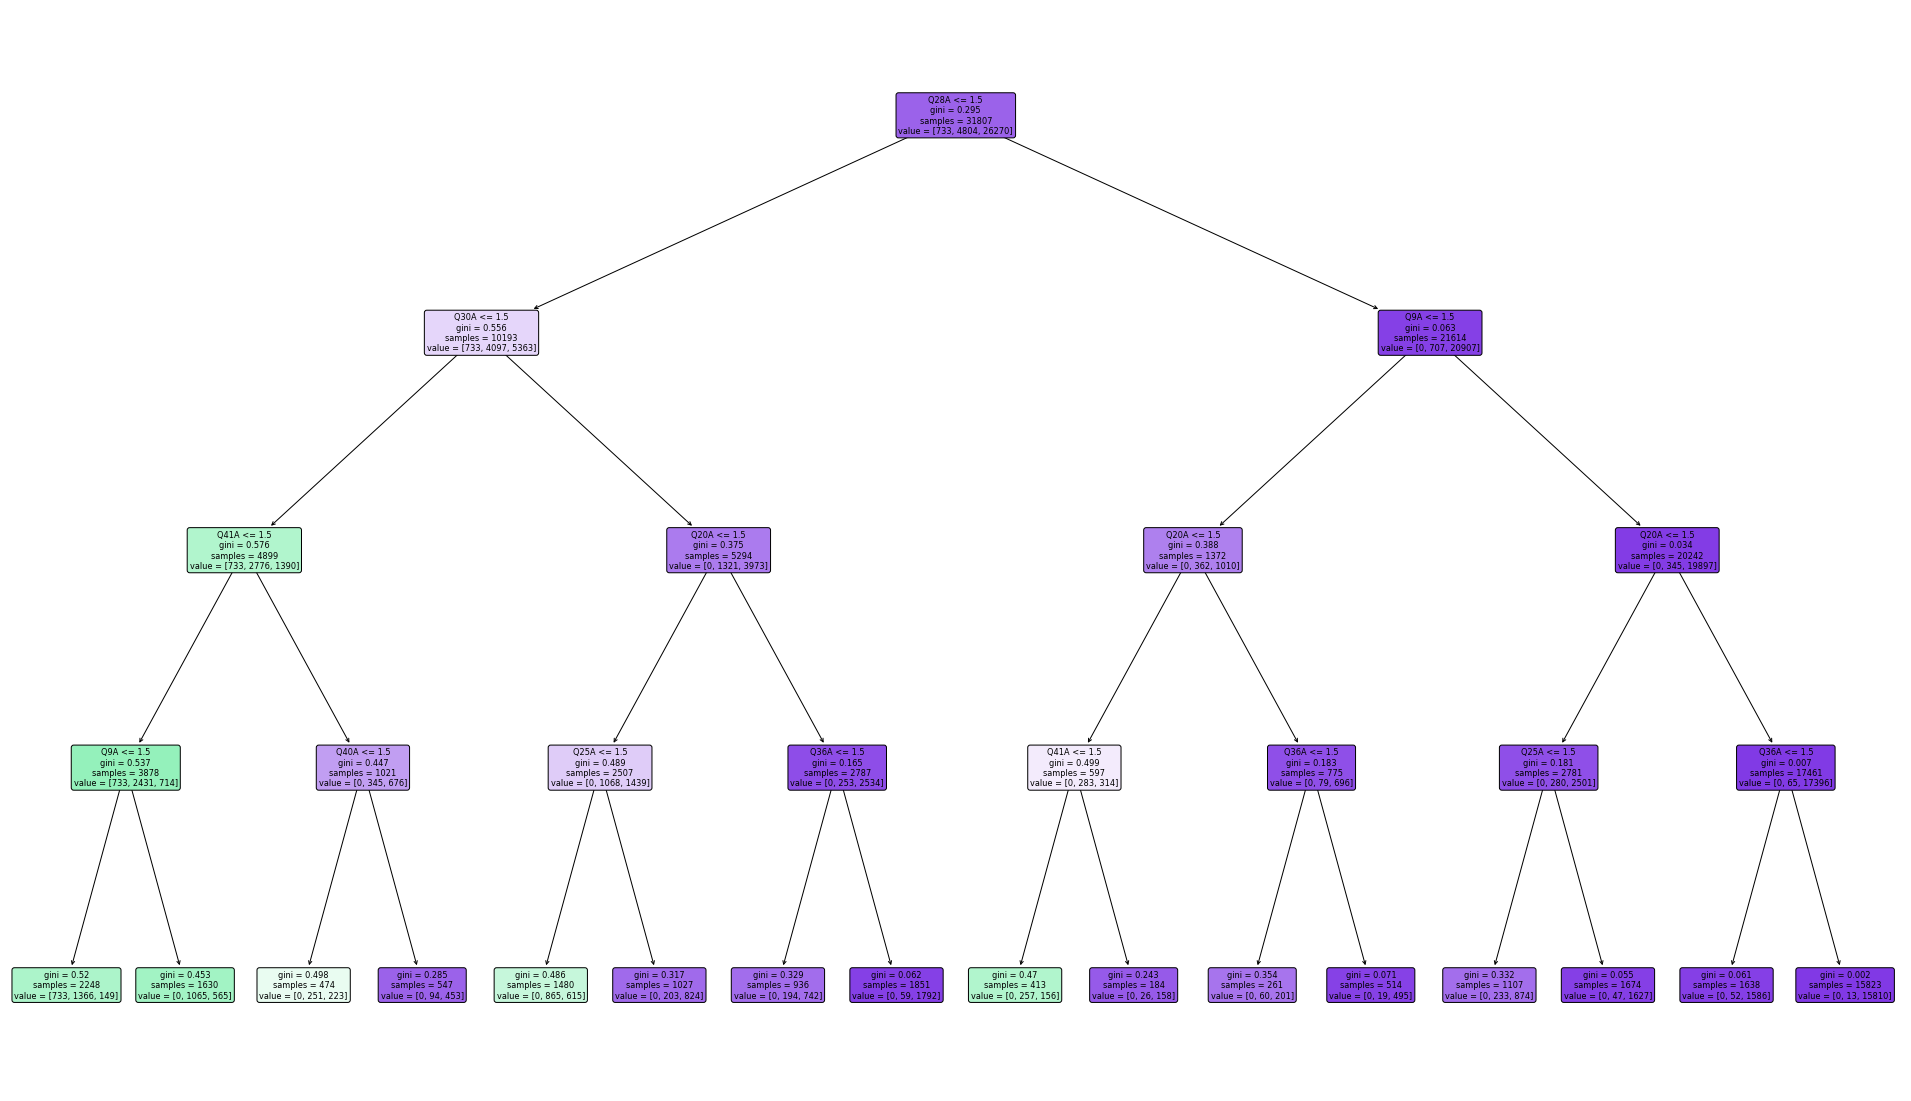

In [9]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))

plot_tree(dt,filled = True, rounded=True,feature_names=X_anxiety.columns)
plt.show()

#### Random forest

In [10]:
# Applying the random forest.
# max_features="sqrt" - this didn't change the final scores.
# Max_depth - less in better, if I have higher nr the scores are more than 90, maybe too good?
# Nr of estimators - tried with 30, 20, 50, 40 - scores didn't change at all.

clf = RandomForestClassifier(max_depth=3, n_estimators=50, random_state=0, bootstrap=True, oob_score=True)
clf.fit(X_train_anx, y_train_anx)
print(clf.score(X_train_anx, y_train_anx))
print(clf.score(X_test_anx, y_test_anx))

0.8931996101487094
0.8983903420523138


In [11]:
# Cross validation, accuracy scores.

clf = RandomForestClassifier(max_depth=4, n_estimators=30, random_state=0)
cross_val_scores_anx = cross_val_score(clf, X_train_anx, y_train_anx, cv=5)
cross_val_scores_anx

array([0.90993398, 0.90961962, 0.90583242, 0.9152649 , 0.90834774])

In [12]:
np.mean(cross_val_scores_anx)

0.9097997310611697

### Solving the imbalancement for anxiety

In [13]:
# Checking the imbalance
# Classes: 1 (moderate), 2 (severe), 3 (extremely severe)

y_anxiety.value_counts()

3    32872
2     5973
1      914
Name: severeness_level_anxiety, dtype: int64

In [14]:
# As the imbalance is very big, 
# I will downsample class 3 and upsample class 1.

class_1_anx = anxiety_data[anxiety_data["severeness_level_anxiety"] == 1]
class_2_anx = anxiety_data[anxiety_data["severeness_level_anxiety"] == 2]
class_3_anx = anxiety_data[anxiety_data["severeness_level_anxiety"] == 3]

In [15]:
class_3_anx_down = class_3_anx.sample(len(class_2_anx,))
class_1_anx_up = class_1_anx.sample(len(class_2_anx), replace=True)

In [16]:
anxiety_data_balanced = pd.concat([class_1_anx_up, class_2_anx, class_3_anx_down], axis=0)

anxiety_data_balanced = anxiety_data_balanced.sample(frac=1)
anxiety_data_balanced["severeness_level_anxiety"].value_counts() 

2    5973
1    5973
3    5973
Name: severeness_level_anxiety, dtype: int64

In [17]:
# Upsampling with smote

smote = SMOTE()

In [18]:
X_anxiety_sm, y_anxiety_sm = smote.fit_resample(X_anxiety, y_anxiety)
y_anxiety_sm.value_counts()

3    32872
2    32872
1    32872
Name: severeness_level_anxiety, dtype: int64

### Modelling with anxiety data, balanced

In [19]:
# With up and down sampling

In [20]:
X_anx_bal = anxiety_data_balanced.drop("severeness_level_anxiety", axis = 1)
y_anx_bal = anxiety_data_balanced["severeness_level_anxiety"]

In [21]:
X_train_anx_bal, X_test_anx_bal, y_train_anx_bal, y_test_anx_bal = train_test_split(X_anx_bal, y_anx_bal, test_size = 0.20, random_state = 123)

In [22]:
# Standardizing the dataframe.

std_scaler = StandardScaler().fit(X_train_anx_bal)
X_anx_bal_train_scaled = std_scaler.transform(X_train_anx_bal)
X_anx_bal_test_scaled = std_scaler.transform(X_test_anx_bal)

In [23]:
# With smote

X_train_anx_sm, X_test_anx_sm, y_train_anx_sm, y_test_anx_sm = train_test_split(X_anxiety_sm, y_anxiety_sm, test_size = 0.20, random_state = 123)

In [24]:
std_scaler = StandardScaler().fit(X_train_anx_sm)
X_anx_sm_train_scaled = std_scaler.transform(X_train_anx_sm)
X_anx_sm_test_scaled = std_scaler.transform(X_test_anx_sm)

#### Logistic regression

Error_metric     Train      Test
0     Accuracy  0.999163  0.998605
1    Precision  0.999159  0.998637
2       Recall  0.999167  0.998576

Confusion matrix for the train set
[[4739    0    0]
 [  10 4795    0]
 [   0    2 4789]]


/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


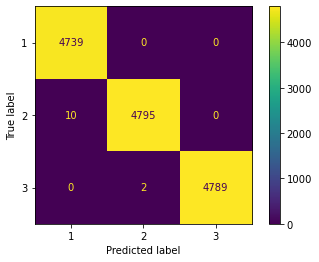



Confusion matrix for the test set
[[1234    0    0]
 [   4 1164    0]
 [   0    1 1181]]


/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


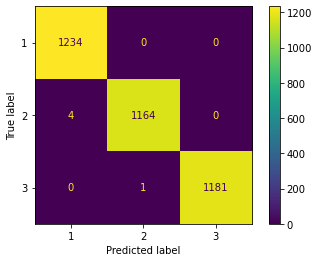

In [25]:
log_model = LogisticRegression(multi_class='ovr') 
log_model.fit(X_anx_bal_train_scaled, y_train_anx_bal)
y_pred_train_log_anx_bal = log_model.predict(X_anx_bal_train_scaled)
y_pred_test_log_anx_bal = log_model.predict(X_anx_bal_test_scaled)

performance_log_anx_bal = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train_anx_bal, y_pred_train_log_anx_bal),
                                         precision_score(y_train_anx_bal, y_pred_train_log_anx_bal, average = "macro"),
                                         recall_score(y_train_anx_bal, y_pred_train_log_anx_bal, average = "macro")],
                               'Test': [accuracy_score(y_test_anx_bal, y_pred_test_log_anx_bal),
                                        precision_score(y_test_anx_bal, y_pred_test_log_anx_bal, average = "macro"),
                                        recall_score(y_test_anx_bal, y_pred_test_log_anx_bal, average = "macro")]})

display(performance_log_anx_bal)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train_anx_bal,y_pred_train_log_anx_bal))
plot_confusion_matrix(log_model,X_anx_bal_train_scaled,y_train_anx_bal, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test_anx_bal, y_pred_test_log_anx_bal))
plot_confusion_matrix(log_model,X_anx_bal_test_scaled,y_test_anx_bal, values_format = 'd')
plt.show()

#### KNN

Error_metric     Train      Test
0     Accuracy  0.999163  0.998605
1    Precision  0.999159  0.998637
2       Recall  0.999167  0.998576

Confusion matrix for the train set
[[4724   15    0]
 [2047 2757    1]
 [  33  795 3963]]


/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


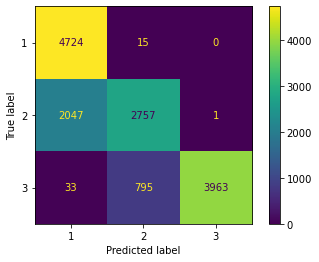



Confusion matrix for the test set
[[1218   16    0]
 [ 565  603    0]
 [  15  227  940]]


/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


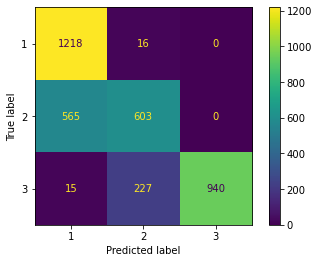

In [26]:
knn_model = KNeighborsClassifier(n_neighbors=6)
knn_model.fit(X_anx_bal_train_scaled, y_train_anx_bal)
y_pred_train_log_anx_bal = knn_model.predict(X_anx_bal_train_scaled)
y_pred_test_log_anx_bal = knn_model.predict(X_anx_bal_test_scaled)

performance_log_dep_bal = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train_anx_bal, y_pred_train_log_anx_bal),
                                         precision_score(y_train_anx_bal, y_pred_train_log_anx_bal, average = "macro"),
                                         recall_score(y_train_anx_bal, y_pred_train_log_anx_bal, average = "macro")],
                               'Test': [accuracy_score(y_test_anx_bal, y_pred_test_log_anx_bal),
                                        precision_score(y_test_anx_bal, y_pred_test_log_anx_bal, average = "macro"),
                                        recall_score(y_test_anx_bal, y_pred_test_log_anx_bal, average = "macro")]})

display(performance_log_anx_bal)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train_anx_bal,y_pred_train_log_anx_bal))
plot_confusion_matrix(knn_model,X_anx_bal_train_scaled,y_train_anx_bal, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test_anx_bal, y_pred_test_log_anx_bal))
plot_confusion_matrix(knn_model,X_anx_bal_test_scaled,y_test_anx_bal, values_format = 'd')
plt.show()

#### Decision tree

Error_metric     Train      Test
0     Accuracy  0.909522  0.900112
1    Precision  0.910383  0.900841
2       Recall  0.909902  0.898453

Confusion matrix for the train set
[[4739  470    6]
 [   0 4111  597]
 [   0  224 4188]]


/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


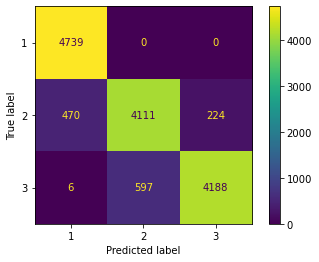



Confusion matrix for the test set
[[1234  114    0]
 [   0  994  184]
 [   0   60  998]]


/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


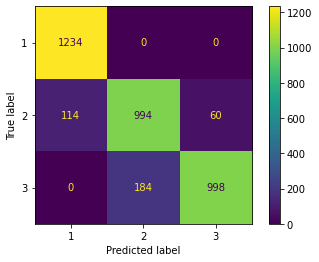

In [27]:
# After up and down sampling

dt = DecisionTreeClassifier(max_depth=5)

dt.fit(X_train_anx_bal, y_train_anx_bal)

y_pred_train_dt_anx_bal = dt.predict(X_train_anx_bal)
y_pred_test_dt_anx_bal = dt.predict(X_test_anx_bal)


performance_df_anx_bal = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train_anx_bal, y_pred_train_dt_anx_bal),
                                         precision_score(y_train_anx_bal, y_pred_train_dt_anx_bal, average = "macro"),
                                         recall_score(y_train_anx_bal, y_pred_train_dt_anx_bal, average = "macro")],
                               'Test': [accuracy_score(y_test_anx_bal, y_pred_test_dt_anx_bal),
                                        precision_score(y_test_anx_bal, y_pred_test_dt_anx_bal, average = "macro"),
                                        recall_score(y_test_anx_bal, y_pred_test_dt_anx_bal, average = "macro")]})

display(performance_df_anx_bal)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train_anx_bal,y_pred_train_dt_anx_bal).T)
plot_confusion_matrix(dt,X_train_anx_bal,y_train_anx_bal, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test_anx_bal,y_pred_test_dt_anx_bal).T)
plot_confusion_matrix(dt,X_test_anx_bal,y_test_anx_bal, values_format = 'd')
plt.show()

Error_metric     Train      Test
0     Accuracy  0.877161  0.876394
1    Precision  0.890839  0.888059
2       Recall  0.876877  0.877535

Confusion matrix for the train set
[[26446  7314    12]
 [    0 18070  1506]
 [    0   859 24685]]


/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


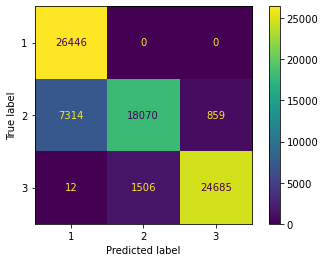

/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)




Confusion matrix for the test set
[[6426 1803    1]
 [   0 4614  422]
 [   0  212 6246]]


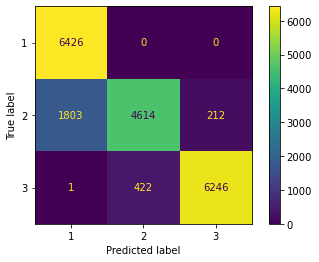

In [28]:
# After SMOTE

dt = DecisionTreeClassifier(max_depth=6)

dt.fit(X_train_anx_sm, y_train_anx_sm)

y_pred_train_dt_anx_sm = dt.predict(X_train_anx_sm)
y_pred_test_dt_anx_sm = dt.predict(X_test_anx_sm)


performance_df_anx_sm = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train_anx_sm, y_pred_train_dt_anx_sm),
                                         precision_score(y_train_anx_sm, y_pred_train_dt_anx_sm, average = "macro"),
                                         recall_score(y_train_anx_sm, y_pred_train_dt_anx_sm, average = "macro")],
                               'Test': [accuracy_score(y_test_anx_sm, y_pred_test_dt_anx_sm),
                                        precision_score(y_test_anx_sm, y_pred_test_dt_anx_sm, average = "macro"),
                                        recall_score(y_test_anx_sm, y_pred_test_dt_anx_sm, average = "macro")]})

display(performance_df_anx_sm)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train_anx_sm,y_pred_train_dt_anx_sm).T)
plot_confusion_matrix(dt,X_train_anx_sm,y_train_anx_sm, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test_anx_sm,y_pred_test_dt_anx_sm).T)
plot_confusion_matrix(dt,X_test_anx_sm,y_test_anx_sm, values_format = 'd')
plt.show()

#### Random forest

In [29]:
clf = RandomForestClassifier(max_depth=4, n_estimators=30, random_state=0, bootstrap=True, oob_score=True)
clf.fit(X_train_anx_bal, y_train_anx_bal)
print(clf.score(X_train_anx_bal, y_train_anx_bal))
print(clf.score(X_test_anx_bal, y_test_anx_bal))

0.9178235088943146
0.908203125


In [30]:
y_pred_anx = clf.predict(X_test_anx_bal)
y_pred_anx

array([2, 1, 2, ..., 3, 2, 1])

In [31]:
# Getting the precision and recall scores

print(classification_report(y_test_anx_bal,y_pred_anx))
print(accuracy_score(y_test_anx_bal, y_pred_anx))

              precision    recall  f1-score   support

           1       0.88      1.00      0.93      1234
           2       0.87      0.84      0.86      1168
           3       0.99      0.88      0.93      1182

    accuracy                           0.91      3584
   macro avg       0.91      0.91      0.91      3584
weighted avg       0.91      0.91      0.91      3584

0.908203125


In [32]:
# Using cross validation. Receiving accuracy scores.

clf = RandomForestClassifier(max_depth=4, n_estimators=30, random_state=0, bootstrap=True, oob_score=True)
cross_val_scores_anx_bal = cross_val_score(clf, X_train_anx_bal, y_train_anx_bal, cv=5)
cross_val_scores_anx_bal

array([0.92291594, 0.92291594, 0.91035926, 0.90896407, 0.91524241])

In [33]:
np.mean(cross_val_scores_anx_bal)

0.9160795256365539

#### Hyperparameters and grid search

In [34]:
# Setting parameter values for finding out which gives the best model.

param_grid_anx = {
    "n_estimators": [15, 20, 30],
    "min_samples_split": [2, 4],
    "min_samples_leaf" : [1, 2],
    "max_features": ["sqrt"],
    "max_depth": [8],
    }
clf = RandomForestClassifier(random_state=100)

In [35]:
# Setting the grid search.

grid_search_anxiety = GridSearchCV(clf, param_grid_anx, cv=5, return_train_score=True, n_jobs=-1,)

In [36]:
# Applying it.

grid_search_anxiety.fit(X_train_anx_bal,y_train_anx_bal)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [8], 'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4],
                         'n_estimators': [15, 20, 30]},
             return_train_score=True)

In [37]:
# The best parameters?

grid_search_anxiety.best_params_

{'max_depth': 8,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 30}

In [38]:
# Results for each search

pd.DataFrame(grid_search_anxiety.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.216848      0.002212         0.014266        0.001074   
1        0.296415      0.003629         0.017463        0.001459   
2        0.426407      0.008429         0.023736        0.001681   
3        0.213823      0.002594         0.013084        0.000370   
4        0.277722      0.005545         0.016772        0.000795   
5        0.411369      0.007167         0.023224        0.001496   
6        0.209470      0.005872         0.014228        0.001214   
7        0.285603      0.009375         0.017151        0.001523   
8        0.412513      0.006940         0.022495        0.001317   
9        0.209189      0.003644         0.013748        0.000707   
10       0.275073      0.002450         0.015857        0.000622   
11       0.380526      0.017229         0.017092        0.001857   

   param_max_depth param_max_features param_min_samples_leaf  \
0                8               sqrt                      1   
1                8               sqrt                      1   
2                8               sqrt                      1   
3                8               sqrt                      1   
4                8               sqrt                      1   
5                8               sqrt                      1   
6                8               sqrt                      2   
7                8               sqrt                      2   
8                8               sqrt                      2   
9                8               sqrt                      2   
10               8               sqrt                      2   
11               8               sqrt                      2   

   param_min_samples_split param_n_estimators  \
0                        2                 15   
1                        2                 20   
2                        2                 30   
3                        4                 15   
4                        4                 20   
5                        4                 30   
6                        2                 15   
7                        2                 20   
8                        2                 30   
9                        4                 15   
10                       4                 20   
11                       4                 30   

                                               params  ...  mean_test_score  \
0   {'max_depth': 8, 'max_features': 'sqrt', 'min_...  ...         0.958423   
1   {'max_depth': 8, 'max_features': 'sqrt', 'min_...  ...         0.963237   
2   {'max_depth': 8, 'max_features': 'sqrt', 'min_...  ...         0.965120   
3   {'max_depth': 8, 'max_features': 'sqrt', 'min_...  ...         0.957168   
4   {'max_depth': 8, 'max_features': 'sqrt', 'min_...  ...         0.961981   
5   {'max_depth': 8, 'max_features': 'sqrt', 'min_...  ...         0.963725   
6   {'max_depth': 8, 'max_features': 'sqrt', 'min_...  ...         0.957865   
7   {'max_depth': 8, 'max_features': 'sqrt', 'min_...  ...         0.962958   
8   {'max_depth': 8, 'max_features': 'sqrt', 'min_...  ...         0.964841   
9   {'max_depth': 8, 'max_features': 'sqrt', 'min_...  ...         0.957865   
10  {'max_depth': 8, 'max_features': 'sqrt', 'min_...  ...         0.962958   
11  {'max_depth': 8, 'max_features': 'sqrt', 'min_...  ...         0.964841   

    std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0         0.003855                9            0.966777            0.967824   
1         0.004142                5            0.972532            0.974974   
2         0.004013                1            0.974625            0.975846   
3         0.003791               12            0.967300            0.968783   
4         0.005650                8            0.971922            0.973317   
5         0.004627                4            0.973230            0.975759   
6         0.002678               10            0.965033            

In [39]:
# Checking the result with cross validation.

clf = RandomForestClassifier(random_state=0, max_depth=8, 
                             min_samples_leaf=1, min_samples_split=4, n_estimators=30, bootstrap=True, oob_score=True)
cross_val_scores_anx = cross_val_score(clf, X_train_anx_bal, y_train_anx_bal, cv=5)
print(np.mean(cross_val_scores_anx))

0.9614230903383326


#### Principal Component Analysis

In [60]:
# First, choosing the nr of components

pca_anx = PCA(n_components=26)
pca_anx_fit = pca_anx.fit(X_anx_bal_train_scaled)

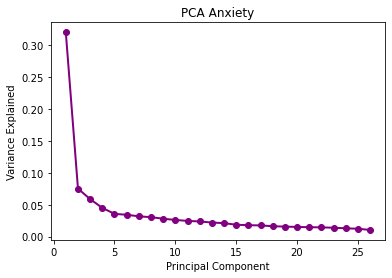

In [62]:
# To see which component is how important

PC_values_anx = np.arange(pca_anx.n_components_) + 1
plt.plot(PC_values_anx, pca_anx.explained_variance_ratio_, 'o-', linewidth=2, color='purple')
plt.title('PCA Anxiety')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [42]:
# Another way, choosing how much information to leave from original

std_scaler = StandardScaler()
X_pca_anx_scaled = std_scaler.fit_transform(X_anx_bal)

In [43]:
X_train_pca_anx, X_test_pca_anx, y_train_pca_anx, y_test_pca_anx = train_test_split(X_pca_anx_scaled, y_anx_bal, test_size = 0.20, random_state = 123)

In [44]:
# Another way
# Set the variance %.
# Leave 95% of information.

pca_anxi = PCA(.95)

In [45]:
# Fit the training set.

X_pca_anx_fitted = pca_anxi.fit_transform(X_train_pca_anx)

In [46]:
# How many principal components to get 95% variance?

X_pca_anx_fitted.shape

(14335, 26)

In [47]:
# How much variance explained by which component

pca_anxi.explained_variance_ratio_

array([0.32028405, 0.07525546, 0.05876731, 0.04510363, 0.03566554,
       0.03406906, 0.03151319, 0.03037291, 0.02806351, 0.02604781,
       0.0245425 , 0.0237329 , 0.02206708, 0.02107084, 0.01858111,
       0.01782587, 0.01754116, 0.01627295, 0.01568442, 0.01506765,
       0.01471558, 0.01448717, 0.01389415, 0.01303875, 0.01224834,
       0.01045688])

In [48]:
# Model after pca

X_train_pca_anx_, X_test_pca_anx_, y_train_pca_anx_, y_test_pca_anx_ = train_test_split(X_pca_anx_fitted, y_train_pca_anx, test_size = 0.20, random_state = 123)

In [49]:
model = RandomForestClassifier(max_depth=8, n_estimators=30, random_state=77, bootstrap=True, oob_score=True)
model.fit(X_train_pca_anx_, y_train_pca_anx_)
model.score(X_test_pca_anx_, y_test_pca_anx_)

0.9487268922218347

#### Feature importance

In [50]:
feature_names_anxiety = X_train_anx_bal.columns
feature_names_anxiety = list(feature_names_anxiety)

In [51]:
clf.fit(X_train_anx_bal, y_train_anx_bal)

RandomForestClassifier(max_depth=8, min_samples_split=4, n_estimators=30,
                       oob_score=True, random_state=0)

In [52]:
anxiety_feature_df = pd.DataFrame(list(zip(feature_names_anxiety, clf.feature_importances_)))
anxiety_feature_df.columns = ['columns_name', 'score_feature_importance']
anxiety_feature_df.sort_values(by=['score_feature_importance'], ascending = False)

columns_name  score_feature_importance
3                           Q9A                  0.206668
6                          Q20A                  0.118263
12                         Q40A                  0.113444
0                           Q2A                  0.070382
10                         Q30A                  0.069439
2                           Q7A                  0.065735
8                          Q25A                  0.060568
11                         Q36A                  0.060068
9                          Q28A                  0.051621
13                         Q41A                  0.045663
5                          Q19A                  0.028605
1                           Q4A                  0.027770
4                          Q15A                  0.027470
29          emotional_stability                  0.016728
7                          Q23A                  0.010735
25  severeness_level_depression                  0.007978
28            conscientiousness                  0.005008
18                          age                  0.003028
26                 extraversion                  0.001722
30      openness_to_experiences                  0.001585
27                agreeableness                  0.001242
24                   familysize                  0.001225
20                     religion                  0.001139
22                         race                  0.001033
14                    education                  0.000629
21                  orientation                  0.000543
15                        urban                  0.000515
23                        voted                  0.000398
17                       engnat                  0.000337
19                         hand                  0.000268
16                       gender                  0.000193

#### Model with selected features

In [53]:
final_features_anxiety = anxiety_data_balanced[["Q9A", "Q40A", "Q20A", "Q2A", "Q30A", "Q36A", "Q28A", "Q7A", "Q25A", "Q41A", "Q19A", "Q4A", "Q15A", "emotional_stability", "severeness_level_depression", "Q23A", "conscientiousness", "age"]]
y_anx_bal = anxiety_data_balanced["severeness_level_anxiety"]

In [54]:
X_train_anx_f, X_test_anx_f, y_train_anx_f, y_test_anx_f = train_test_split(final_features_anxiety, y_anx_bal, test_size = 0.20, random_state = 123)


In [55]:
# I choose random forest as this was the model so far. I will use the parameters from the grid search.

clf = RandomForestClassifier(max_depth=8, n_estimators=30, random_state=0, bootstrap=True, oob_score=True)
cross_val_scores_anx_f = cross_val_score(clf, X_train_anx_f, y_train_anx_f, cv=5)
cross_val_scores_anx_f

array([0.9689571 , 0.96093478, 0.96093478, 0.95674922, 0.96756191])

In [56]:
np.mean(cross_val_scores_anx_f)

0.9630275549354727

### Conclusion

In [57]:
# Models perform better after balancing. Logistic regression and KNN even too good. I will continue with decision
# tree and random forest.
# I will keep the down and up sampling for further models.
# The best one is random forest with cross validation and after grid search and feature selection.
# The model worked also very good after PCA with random forest.
# I could even use smaller parameters for grid search?


# 3 most important features: Q9, Q40, Q20
# Q23 was separately from others.
# Most important personality features: emotional stability (and conscientiousness)
# Most important demographic: age

# Q9:  I found myself in situations that made me so anxious I was most relieved when they ended.
# Q40: I was worried about situations in which I might panic and make a fool of myself.
# Q20: I felt scared without any good reason.